In [8]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score

In [11]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [12]:
df = pd.read_csv("Desktop/carnivore-spotter-export3.csv")

In [13]:
cols = ['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Latitude', 'Longitude', 'Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs']
df.columns = cols

In [14]:
df = df[(df['Latitude']>minLat)&(df['Latitude']<maxLat)&(df['Longitude']>minLon)&(df['Longitude']<maxLon)]

In [15]:
df['Time_Seen']=pd.to_datetime(df.Time_Seen).copy()

In [16]:
df['Month']=df.Time_Seen.dt.month

In [17]:
summer = df[(df.Month>=6)&(df.Month<=8)] 
fall = df[(df.Month>=9)&(df.Month<=11)]
winter = df[(df.Month==12)|((df.Month==1)|(df.Month==2))]
spring = df[(df.Month>=3)&(df.Month<=5)]

In [18]:
coyo_sum = summer[summer.Species=='Coyote']
coyo_fall = fall[fall.Species=='Coyote']
coyo_winter = winter[winter.Species=='Coyote']
coyo_spring = spring[spring.Species=='Coyote']

In [19]:
#black bear
b_sum = summer[summer.Species=='Black Bear']
b_fall = fall[fall.Species=='Black Bear']
b_winter = winter[winter.Species=='Black Bear']
b_spring = spring[spring.Species=='Black Bear']

In [20]:
#raccoon
r_sum = summer[summer.Species=='Raccoon']
r_fall = fall[fall.Species=='Raccoon']
r_winter = winter[winter.Species=='Raccoon']
r_spring = spring[spring.Species=='Raccoon']

In [21]:
#coyote,black bear, raccoon
cbr_summer = summer[(summer.Species=='Coyote')|(summer.Species=='Black Bear')|(summer.Species=='Raccoon')]
cbr_fall = fall[(fall.Species=='Coyote')|(fall.Species=='Black Bear')|(fall.Species=='Raccoon')]
cbr_winter = winter[(winter.Species=='Coyote')|(winter.Species=='Black Bear')|(winter.Species=='Raccoon')]
cbr_spring = spring[(spring.Species=='Coyote')|(spring.Species=='Black Bear')|(spring.Species=='Raccoon')]

In [22]:
summer = summer.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
fall = fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
winter = winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
spring = spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [23]:
coyo_sum = coyo_sum.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
coyo_fall = coyo_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
coyo_winter = coyo_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
coyo_spring = coyo_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [24]:
b_sum=b_sum.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
b_fall=b_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
b_winter=b_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
b_spring=b_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [25]:
r_sum=r_sum.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
r_fall=r_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
r_winter=r_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
r_spring=r_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [26]:
cbr_summer = cbr_summer.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
cbr_fall = cbr_fall.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
cbr_winter = cbr_winter.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)
cbr_spring = cbr_spring.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs','Month'],axis=1)

In [27]:
#handle missing data if there is any
summer.fillna(method='bfill',inplace=True)
fall.fillna(method='bfill',inplace=True)
winter.fillna(method='bfill',inplace=True)
spring.fillna(method='bfill',inplace=True)

coyo_sum.fillna(method='bfill',inplace=True)
coyo_fall.fillna(method='bfill',inplace=True)
coyo_winter.fillna(method='bfill',inplace=True)
coyo_spring.fillna(method='bfill',inplace=True)

b_sum.fillna(method='bfill',inplace=True)
b_fall.fillna(method='bfill',inplace=True)
b_winter.fillna(method='bfill',inplace=True) #0sample
b_spring.fillna(method='bfill',inplace=True)

r_sum.fillna(method='bfill',inplace=True)
r_fall.fillna(method='bfill',inplace=True)
r_winter.fillna(method='bfill',inplace=True)
r_spring.fillna(method='bfill',inplace=True)

cbr_summer.fillna(method='bfill',inplace=True)
cbr_fall.fillna(method='bfill',inplace=True)
cbr_winter.fillna(method='bfill',inplace=True)
cbr_spring.fillna(method='bfill',inplace=True)

In [28]:
summer_scaled=StandardScaler().fit_transform(summer)
fall_scaled=StandardScaler().fit_transform(fall)
winter_scaled=StandardScaler().fit_transform(winter)
spring_scaled=StandardScaler().fit_transform(spring)

In [29]:
#coyote
coyo_summer_scaled=StandardScaler().fit_transform(coyo_sum)
coyo_fall_scaled=StandardScaler().fit_transform(coyo_fall)
coyo_winter_scaled=StandardScaler().fit_transform(coyo_winter)
coyo_spring_scaled=StandardScaler().fit_transform(coyo_spring)

In [30]:
#black bear
b_summer_scaled=StandardScaler().fit_transform(b_sum)
b_fall_scaled=StandardScaler().fit_transform(b_fall)
#b_winter_scaled=StandardScaler().fit_transform(b_winter)
b_spring_scaled=StandardScaler().fit_transform(b_spring)

In [31]:
#raccoon
r_summer_scaled=StandardScaler().fit_transform(r_sum)
r_fall_scaled=StandardScaler().fit_transform(r_fall)
r_winter_scaled=StandardScaler().fit_transform(r_winter)
r_spring_scaled=StandardScaler().fit_transform(r_spring)

In [32]:
#cbr
cbr_summer_scaled=StandardScaler().fit_transform(cbr_summer)
cbr_fall_scaled=StandardScaler().fit_transform(cbr_fall)
cbr_winter_scaled=StandardScaler().fit_transform(cbr_winter)
cbr_spring_scaled=StandardScaler().fit_transform(cbr_spring)

In [35]:
bandwidth = estimate_bandwidth(summer_scaled, quantile=0.2, n_samples=500)
ms_summer = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_summer.fit(summer_scaled)
summer_labels = ms_summer.labels_
summer_cluster_centers = ms_summer.cluster_centers_
realClusterNum_summer = len(set(summer_labels))-(1 if -1 in summer_labels else 0)
clusterNum_summer = len(set(summer_labels))
print("realclusterNum_summer",realClusterNum_summer)
print("clusterNum_summer",clusterNum_summer)

bandwidth = estimate_bandwidth(fall_scaled, quantile=0.2, n_samples=500)
ms_fall = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_fall.fit(fall_scaled)
fall_labels = ms_fall.labels_
fall_cluster_centers = ms_fall.cluster_centers_
realClusterNum_fall = len(set(fall_labels))-(1 if -1 in fall_labels else 0)
clusterNum_fall = len(set(fall_labels))
print("realclusterNum_fall",realClusterNum_fall)
print("clusterNum_fall",clusterNum_fall)

bandwidth = estimate_bandwidth(winter_scaled, quantile=0.2, n_samples=500)
ms_winter = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_winter.fit(winter_scaled)
winter_labels = ms_winter.labels_
winter_cluster_centers = ms_winter.cluster_centers_
realClusterNum_winter = len(set(winter_labels))-(1 if -1 in winter_labels else 0)
clusterNum_winter = len(set(winter_labels))
print("realclusterNum_winter",realClusterNum_fall)
print("clusterNum_winter",clusterNum_fall)

bandwidth = estimate_bandwidth(spring_scaled, quantile=0.2, n_samples=500)
ms_spring = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_spring.fit(spring_scaled)
spring_labels = ms_spring.labels_
spring_cluster_centers = ms_spring.cluster_centers_
realClusterNum_spring = len(set(spring_labels))-(1 if -1 in spring_labels else 0)
clusterNum_spring = len(set(spring_labels))
print("realclusterNum_spring",realClusterNum_spring)
print("clusterNum_spring",clusterNum_spring)

realclusterNum_summer 5
clusterNum_summer 5
realclusterNum_fall 11
clusterNum_fall 11
realclusterNum_winter 11
clusterNum_winter 11
realclusterNum_spring 6
clusterNum_spring 6


In [37]:
#coyote
bandwidth = estimate_bandwidth(coyo_summer_scaled, quantile=0.2, n_samples=500)
ms_summer_coyo = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_summer_coyo.fit(coyo_summer_scaled)
coyo_summer_labels = ms_summer_coyo.labels_
realClusterNum_summer_coyo = len(set(coyo_summer_labels))-(1 if -1 in coyo_summer_labels else 0)
clusterNum_summer_coyo = len(set(coyo_summer_labels))
print("realclusterNum_summer_coyo",realClusterNum_summer_coyo)
print("clusterNum_summer_coyo",clusterNum_summer_coyo)

bandwidth = estimate_bandwidth(coyo_fall_scaled, quantile=0.2, n_samples=500)
ms_fall_coyo = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_fall_coyo.fit(coyo_fall_scaled)
coyo_fall_labels = ms_fall_coyo.labels_
realClusterNum_fall_coyo = len(set(coyo_fall_labels))-(1 if -1 in coyo_fall_labels else 0)
clusterNum_fall_coyo = len(set(coyo_fall_labels))
print("realclusterNum_fall_coyo",realClusterNum_fall_coyo)
print("clusterNum_fall_coyo",clusterNum_fall_coyo)

bandwidth = estimate_bandwidth(coyo_winter_scaled, quantile=0.2, n_samples=500)
ms_winter_coyo = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_winter_coyo.fit(coyo_winter_scaled)
coyo_winter_labels = ms_winter_coyo.labels_
realClusterNum_winter_coyo = len(set(coyo_winter_labels))-(1 if -1 in coyo_winter_labels else 0)
clusterNum_winter_coyo = len(set(coyo_winter_labels))
print("realclusterNum_winter_coyo",realClusterNum_winter_coyo)
print("clusterNum_winter_coyo",clusterNum_winter_coyo)

bandwidth = estimate_bandwidth(coyo_spring_scaled, quantile=0.2, n_samples=500)
ms_spring_coyo = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_spring_coyo.fit(coyo_spring_scaled)
coyo_spring_labels = ms_spring_coyo.labels_
realClusterNum_spring_coyo = len(set(coyo_spring_labels))-(1 if -1 in coyo_spring_labels else 0)
clusterNum_spring_coyo = len(set(coyo_spring_labels))
print("realclusterNum_spring",realClusterNum_spring_coyo)
print("clusterNum_spring",clusterNum_spring_coyo)

realclusterNum_summer_coyo 9
clusterNum_summer_coyo 9
realclusterNum_fall_coyo 19
clusterNum_fall_coyo 19
realclusterNum_winter_coyo 5
clusterNum_winter_coyo 5
realclusterNum_spring 7
clusterNum_spring 7


In [38]:
#black bear
bandwidth = estimate_bandwidth(b_summer_scaled, quantile=0.2, n_samples=500)
ms_summer_b = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_summer_b.fit(b_summer_scaled)
b_summer_labels = ms_summer_b.labels_
realClusterNum_summer_b = len(set(b_summer_labels))-(1 if -1 in b_summer_labels else 0)
clusterNum_summer_b = len(set(b_summer_labels))
print("realclusterNum_summer_b",realClusterNum_summer_b)
print("clusterNum_summer_b",clusterNum_summer_b)

bandwidth = estimate_bandwidth(b_fall_scaled, quantile=0.2, n_samples=500)
ms_fall_b = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_fall_b.fit(b_fall_scaled)
b_fall_labels = ms_fall_b.labels_
realClusterNum_fall_b = len(set(b_fall_labels))-(1 if -1 in b_fall_labels else 0)
clusterNum_fall_b = len(set(b_fall_labels))
print("realclusterNum_fall_b",realClusterNum_fall_b)
print("clusterNum_fall_b",clusterNum_fall_b)

bandwidth = estimate_bandwidth(b_spring_scaled, quantile=0.2, n_samples=500)
ms_spring_b = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_spring_b.fit(b_spring_scaled)
b_spring_labels = ms_spring_b.labels_
realClusterNum_spring_b = len(set(b_spring_labels))-(1 if -1 in b_spring_labels else 0)
clusterNum_spring_b = len(set(b_spring_labels))
print("realclusterNum_spring_b",realClusterNum_spring_b)
print("clusterNum_spring_b",clusterNum_spring_b)




realclusterNum_summer_b 6
clusterNum_summer_b 6
realclusterNum_fall_b 9
clusterNum_fall_b 9
realclusterNum_spring_b 6
clusterNum_spring_b 6


In [47]:
#raccoon
bandwidth = estimate_bandwidth(r_summer_scaled, quantile=0.2, n_samples=500)
ms_summer_r = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_summer_r.fit(r_summer_scaled)
r_summer_labels = ms_summer_r.labels_
realClusterNum_summer_r = len(set(r_summer_labels))-(1 if -1 in r_summer_labels else 0)
clusterNum_summer_r = len(set(r_summer_labels))
print("realclusterNum_summer_r",realClusterNum_summer_r)
print("clusterNum_summer_r",clusterNum_summer_r)

bandwidth = estimate_bandwidth(r_fall_scaled, quantile=0.2, n_samples=500)
ms_fall_r = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_fall_r.fit(r_fall_scaled)
r_fall_labels = ms_fall_r.labels_
realClusterNum_fall_r = len(set(r_fall_labels))-(1 if -1 in r_fall_labels else 0)
clusterNum_fall_r = len(set(r_fall_labels))
print("realclusterNum_fall_r",realClusterNum_fall_r)
print("clusterNum_fall_r",clusterNum_fall_r)

bandwidth = estimate_bandwidth(r_winter_scaled, quantile=0.2, n_samples=500)
ms_winter_r = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_winter_r.fit(r_winter_scaled)
r_winter_labels = ms_winter_r.labels_
realClusterNum_winter_r = len(set(r_winter_labels))-(1 if -1 in r_winter_labels else 0)
clusterNum_winter_r = len(set(r_winter_labels))
print("realclusterNum_winter_r",realClusterNum_winter_r)
print("clusterNum_winter_r",clusterNum_winter_r)

#bandwidth = estimate_bandwidth(r_spring_scaled, quantile=0.2, n_samples=100)
#ms_spring_r = MeanShift(bandwidth=bandwidth, bin_seeding=True)
#ms_spring_r.fit(r_spring_scaled)
#r_spring_labels = ms_spring_r.labels_
#realClusterNum_spring_r = len(set(r_spring_labels))-(1 if -1 in r_spring_labels else 0)
#clusterNum_spring_r = len(set(r_spring_labels))
#print("realclusterNum_spring_r",realClusterNum_spring_r)
#print("clusterNum_spring_r",clusterNum_spring_r)

realclusterNum_summer_r 6
clusterNum_summer_r 6
realclusterNum_fall_r 11
clusterNum_fall_r 11
realclusterNum_winter_r 5
clusterNum_winter_r 5


In [48]:
#cbr
bandwidth = estimate_bandwidth(cbr_summer_scaled, quantile=0.2, n_samples=500)
ms_summer_cbr = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_summer_cbr.fit(cbr_summer_scaled)
cbr_summer_labels = ms_summer_cbr.labels_
realClusterNum_summer_cbr = len(set(cbr_summer_labels))-(1 if -1 in cbr_summer_labels else 0)
clusterNum_summer_cbr = len(set(cbr_summer_labels))
print("realclusterNum_summer_cbr",realClusterNum_summer_cbr)
print("clusterNum_summer_cbr",clusterNum_summer_cbr)

bandwidth = estimate_bandwidth(cbr_fall_scaled, quantile=0.2, n_samples=500)
ms_fall_cbr = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_fall_cbr.fit(cbr_fall_scaled)
cbr_fall_labels = ms_fall_cbr.labels_
realClusterNum_fall_cbr = len(set(cbr_fall_labels))-(1 if -1 in cbr_fall_labels else 0)
clusterNum_fall_cbr = len(set(cbr_fall_labels))
print("realclusterNum_fall_cbr",realClusterNum_fall_cbr)
print("clusterNum_fall_cbr",clusterNum_fall_cbr)

bandwidth = estimate_bandwidth(cbr_winter_scaled, quantile=0.2, n_samples=500)
ms_winter_cbr = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_winter_cbr.fit(cbr_winter_scaled)
cbr_winter_labels = ms_winter_cbr.labels_
realClusterNum_winter_cbr = len(set(cbr_winter_labels))-(1 if -1 in cbr_winter_labels else 0)
clusterNum_winter_cbr = len(set(cbr_winter_labels))
print("realclusterNum_winter_cbr",realClusterNum_winter_cbr)
print("clusterNum_winter_cbr",clusterNum_winter_cbr)

bandwidth = estimate_bandwidth(cbr_spring_scaled, quantile=0.2, n_samples=500)
ms_spring_cbr = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_spring_cbr.fit(cbr_spring_scaled)
cbr_spring_labels = ms_spring_cbr.labels_
realClusterNum_spring_cbr = len(set(cbr_spring_labels))-(1 if -1 in cbr_spring_labels else 0)
clusterNum_spring_cbr = len(set(cbr_spring_labels))
print("realclusterNum_spring_cbr",realClusterNum_spring_cbr)
print("clusterNum_spring_cbr",clusterNum_spring_cbr)


realclusterNum_summer_cbr 7
clusterNum_summer_cbr 7
realclusterNum_fall_cbr 13
clusterNum_fall_cbr 13
realclusterNum_winter_cbr 6
clusterNum_winter_cbr 6
realclusterNum_spring_cbr 7
clusterNum_spring_cbr 7


In [49]:
y_pred_summer = ms_summer.fit_predict(summer_scaled)
y_pred_fall = ms_fall.fit_predict(fall_scaled)
y_pred_winter = ms_winter.fit_predict(winter_scaled)
y_pred_spring = ms_spring.fit_predict(spring_scaled)

In [50]:
#coyote
y_pred_summer_coyo = ms_summer_coyo.fit_predict(coyo_summer_scaled)
y_pred_fall_coyo = ms_fall_coyo.fit_predict(coyo_fall_scaled)
y_pred_winter_coyo = ms_winter_coyo.fit_predict(coyo_winter_scaled)
y_pred_spring_coyo = ms_spring_coyo.fit_predict(coyo_spring_scaled)

In [51]:
#black bear
y_pred_summer_b = ms_summer_b.fit_predict(b_summer_scaled)
y_pred_fall_b= ms_fall_b.fit_predict(b_fall_scaled)
y_pred_spring_b = ms_spring_b.fit_predict(b_spring_scaled)

In [53]:
#raccoon
y_pred_summer_r = ms_summer_r.fit_predict(r_summer_scaled)
y_pred_fall_r= ms_fall_r.fit_predict(r_fall_scaled)
y_pred_winter_r = ms_winter_r.fit_predict(r_winter_scaled)
#y_pred_spring_r = ms_spring_r.fit_predict(r_spring_scaled)

In [54]:
#cbr
y_pred_summer_cbr = ms_summer_cbr.fit_predict(cbr_summer_scaled)
y_pred_fall_cbr= ms_fall_cbr.fit_predict(cbr_fall_scaled)
y_pred_winter_cbr = ms_winter_cbr.fit_predict(cbr_winter_scaled)
y_pred_spring_cbr = ms_spring_cbr.fit_predict(cbr_spring_scaled)

Text(0.5, 1.0, 'Winter')

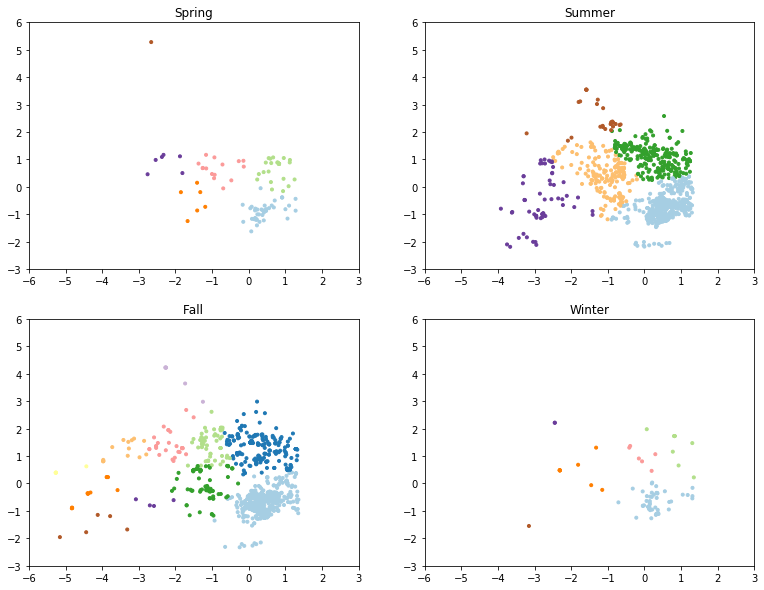

In [55]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(spring_scaled[:,0],spring_scaled[:,1],c=y_pred_spring,cmap='Paired',marker='.')
axs[0,0].set_title('Spring')
axs[0,1].scatter(summer_scaled[:,0],summer_scaled[:,1],c=y_pred_summer,cmap='Paired',marker='.')
axs[0,1].set_title('Summer')
axs[1,0].scatter(fall_scaled[:,0],fall_scaled[:,1],c=y_pred_fall,cmap='Paired',marker='.')
axs[1,0].set_title('Fall')
axs[1,1].scatter(winter_scaled[:,0],winter_scaled[:,1],c=y_pred_winter,cmap='Paired',marker='.')
axs[1,1].set_title('Winter')

In [56]:
#all species
summer_clus = [summer_scaled[summer_labels == i] for i in range(realClusterNum_summer)]
print(summer_clus[0])

[[ 0.42074696 -0.76939438]
 [ 0.4033946  -1.21745745]
 [ 1.12306179 -1.02004946]
 ...
 [-0.83874096 -1.1279328 ]
 [ 0.70022768 -1.03290951]
 [ 0.05486258 -1.07262909]]


Text(0.5, 1.0, 'Winter coyote')

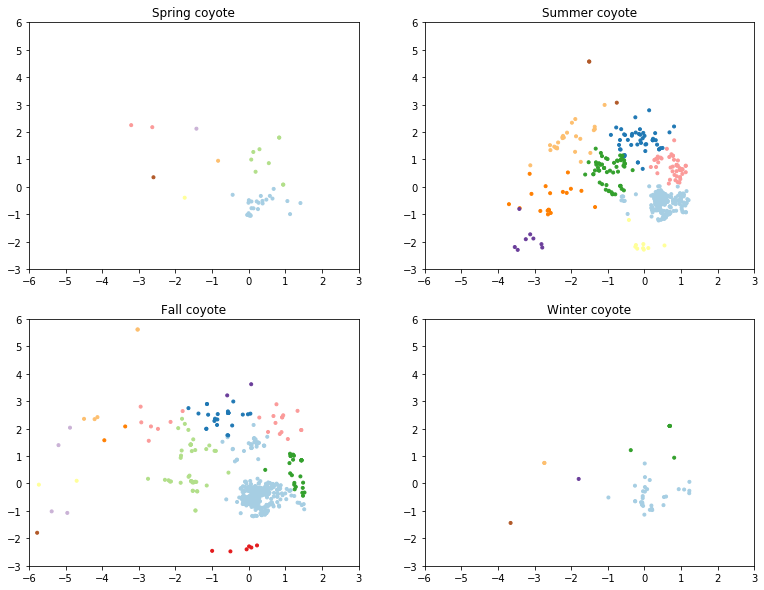

In [57]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(coyo_spring_scaled[:,0],coyo_spring_scaled[:,1],c=y_pred_spring_coyo,cmap='Paired',marker='.')
axs[0,0].set_title('Spring coyote')
axs[0,1].scatter(coyo_summer_scaled[:,0],coyo_summer_scaled[:,1],c=y_pred_summer_coyo,cmap='Paired',marker='.')
axs[0,1].set_title('Summer coyote')
axs[1,0].scatter(coyo_fall_scaled[:,0],coyo_fall_scaled[:,1],c=y_pred_fall_coyo,cmap='Paired',marker='.')
axs[1,0].set_title('Fall coyote')
axs[1,1].scatter(coyo_winter_scaled[:,0],coyo_winter_scaled[:,1],c=y_pred_winter_coyo,cmap='Paired',marker='.')
axs[1,1].set_title('Winter coyote')

Text(0.5, 1.0, 'Winter black bear')

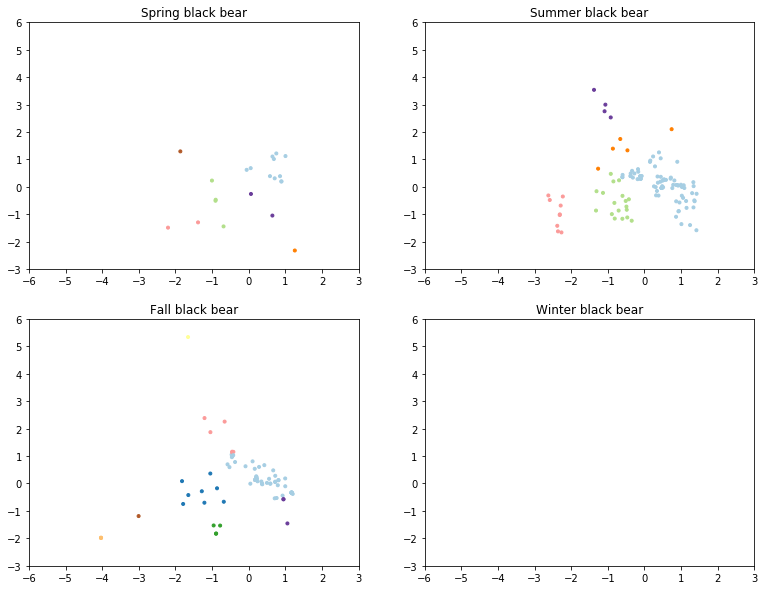

In [58]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(b_spring_scaled[:,0],b_spring_scaled[:,1],c=y_pred_spring_b,cmap='Paired',marker='.')
axs[0,0].set_title('Spring black bear')
axs[0,1].scatter(b_summer_scaled[:,0],b_summer_scaled[:,1],c=y_pred_summer_b,cmap='Paired',marker='.')
axs[0,1].set_title('Summer black bear')
axs[1,0].scatter(b_fall_scaled[:,0],b_fall_scaled[:,1],c=y_pred_fall_b,cmap='Paired',marker='.')
axs[1,0].set_title('Fall black bear')
axs[1,1].set_title('Winter black bear')

Text(0.5, 1.0, 'Winter raccoon')

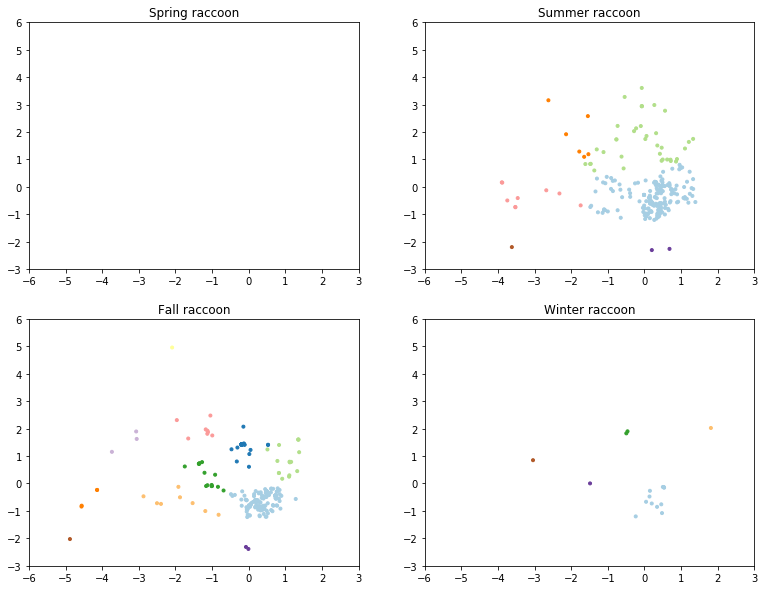

In [60]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].set_title('Spring raccoon')
axs[0,1].scatter(r_summer_scaled[:,0],r_summer_scaled[:,1],c=y_pred_summer_r,cmap='Paired',marker='.')
axs[0,1].set_title('Summer raccoon')
axs[1,0].scatter(r_fall_scaled[:,0],r_fall_scaled[:,1],c=y_pred_fall_r,cmap='Paired',marker='.')
axs[1,0].set_title('Fall raccoon')
axs[1,1].scatter(r_winter_scaled[:,0],r_winter_scaled[:,1],c=y_pred_winter_r,cmap='Paired',marker='.')
axs[1,1].set_title('Winter raccoon')

Text(0.5, 1.0, 'Winter coyote,black bear,raccoon')

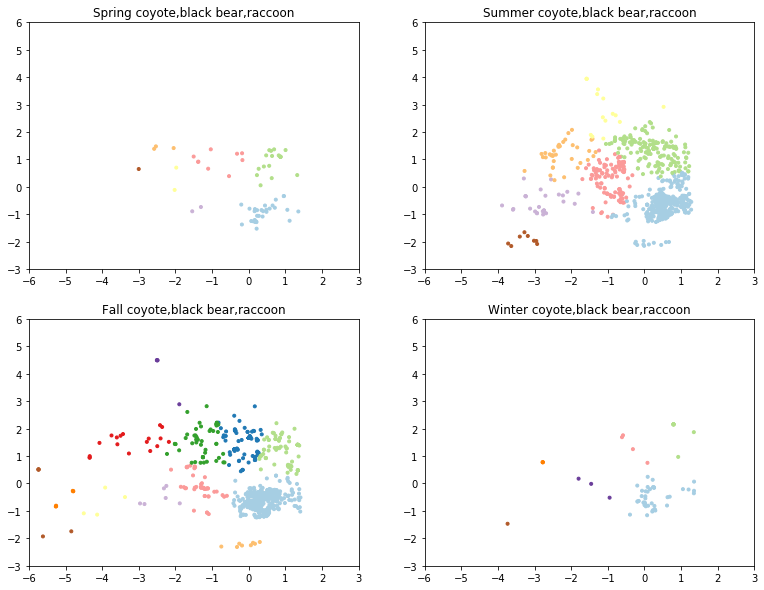

In [61]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(cbr_spring_scaled[:,0],cbr_spring_scaled[:,1],c=y_pred_spring_cbr,cmap='Paired',marker='.')
axs[0,0].set_title('Spring coyote,black bear,raccoon')
axs[0,1].scatter(cbr_summer_scaled[:,0],cbr_summer_scaled[:,1],c=y_pred_summer_cbr,cmap='Paired',marker='.')
axs[0,1].set_title('Summer coyote,black bear,raccoon')
axs[1,0].scatter(cbr_fall_scaled[:,0],cbr_fall_scaled[:,1],c=y_pred_fall_cbr,cmap='Paired',marker='.')
axs[1,0].set_title('Fall coyote,black bear,raccoon')
axs[1,1].scatter(cbr_winter_scaled[:,0],cbr_winter_scaled[:,1],c=y_pred_winter_cbr,cmap='Paired',marker='.')
axs[1,1].set_title('Winter coyote,black bear,raccoon')

In [22]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [23]:
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 11


In [24]:
from itertools import cycle

In [25]:
plt.figure(1)
plt.clf()

<Figure size 432x288 with 0 Axes>

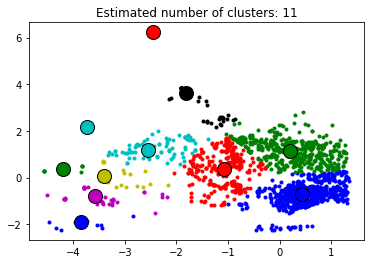

In [26]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(df_scaled[my_members, 0], df_scaled[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()